In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Постановка задачи 

Коллимированный гауссов луч с радиусом $\omega$ по $е^{-1}$ падает на линзу с переменным фокусным расстоянием $F$. Линза находиться на расстоянии $d=f$ от собирающей линзы с фокусным расстоянием $f$. Найти:

1. Расстояние $r$ на котором формируется перетяжка от $F$.

2. Размер перетяжки $\sigma$ по $е^{-1}$ от $F$.

3. Как изменятся зависимости выше, если $d=f \pm \delta$ от дельта.



## Поиск ABCD матрицы

Найдём матрицу данной геометрической системы 

$$ M = \begin{pmatrix} 1 & x \\ 0 & 1 \end{pmatrix}   \cdot \begin{pmatrix} 1 & 0\\ -1/f & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & f\\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ -1/F & 1 \end{pmatrix} = \begin{pmatrix} 1 - f/F - x/f & f \\ -1/f & 0 \end{pmatrix},$$ 
где $x$ &mdash; растояние от второй линзы до перетяжки. 

In [4]:
omega = 1.7 * 10**(-3) # m
lambdaa = 1064 * 10**(-9) # m
f = 0.4 # m  
d = f # m


def abcd_matrix(x, f, F, d):
    '''Возвращает ABCD матрицу'''
    P1 = np.array([[1, 0], [-1/F, 1]])
    T1 = np.array([[1, d], [0, 1]])
    P2 = np.array([[1, 0], [-1/f, 1]])
    T2 = np.array([[1, x], [0, 1]])
    M = np.dot(np.dot((np.dot(T2, P2)), T1), P1)
    return M

## Правило ABCD для $M$

$$q_2 = \frac{Aq_1 + B}{Cq_1 + D},$$

 Где $q_1$ &mdash; параметр из выражения для гаусого пучка. 
 
 В месте перетяжки радиус кривизны равен $\infty$ и $q_2$ имеет только мнимую часть. Так в нашей задаче $D = 0$ и пучок коллимированный, то $q_2$ будет чисто мнимым при $A = 0$, то есть 

$$1 - \frac{f}{F} - \frac{x}{f} = 0,$$
откуда получаем зависимость 
$$r(F) = f - \frac{f^2}{F}$$ 



In [5]:
def linear(M):
    A = M[0][0]
    B = M[0][1]
    C = M[1][0]
    D = M[1][1]
    return [A, B, C, D]

Посторим график для конретных значений: 

$\omega=1.7 \cdot 10^{-3} \; m$

$\lambda = 1064 \; nm$
 
$d = f = 40 \; cm$

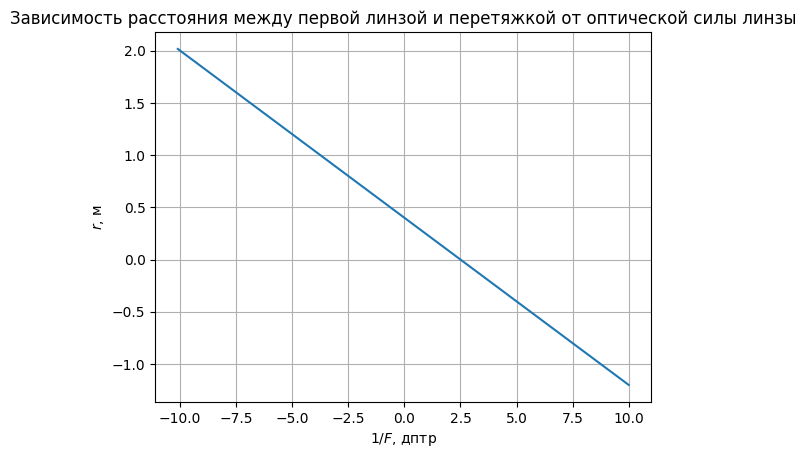

In [6]:
#plt.figure(figsize=(8,6), dpi=100) 

plt.ylabel("$r$, м") 
plt.xlabel("$1/F$, дптр")
plt.title('Зависимость расстояния между первой линзой и перетяжкой от оптической силы линзы') 
plt.grid()
x = np.arange(-10.1, 10.1, 0.1)
plt.plot(x, f - f**2 * x)


Так как в месте перетяжки $D = 0$ и $A = 0$, то ABCD-правило записывается так: 

$$\frac{1}{q_2} = \frac{C}{B(1/q_1)},$$
отсюда
$$i\frac{\lambda}{\pi \omega_1^2} = \frac{C}{Bi \lambda/(\pi \omega_0^2)},$$
после некоторых преобразований получаем: 

$$\omega_1 = \frac{\lambda f}{\pi \omega_0}$$

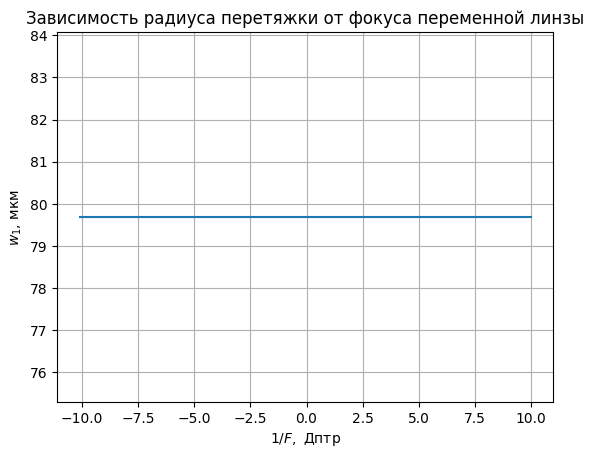

In [7]:
plt.ylabel('$w_1$, мкм')
plt.xlabel('$1/F,$ Дптр')
plt.title('Зависимость радиуса перетяжки от фокуса переменной линзы')
plt.grid()

x = np.arange(-10.1, 10.1, 0.1)
plt.plot(x, x*0 + 10**6 * (lambdaa * f) / (np.pi * omega))

## Матрица ABCD для произвольного $d$

Найдём матрицу данной геометрической системы 

$$ M = \begin{pmatrix} 1 & x \\ 0 & 1 \end{pmatrix}   \cdot \begin{pmatrix} 1 & 0\\ -1/f & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & d\\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & 0 \\ -1/F & 1 \end{pmatrix} = \frac{1}{f}\begin{pmatrix} \frac{-df + dx+ fF - fx - Fx}{F} & df-dx+fx \\ \frac{d-f-F}{F} & f-d  \end{pmatrix} ,$$ 
где $x$ &mdash; растояние от второй линзы до перетяжки. 

## Правило ABCD для произвольного $d$

Запишем преобразованное правило ABCD:

$$\frac{1}{q_2}  = \frac{C + D(1/q_1)}{A + B(1/q_1)}.$$

В месте перетяжки радиус кривизны луча будет равне $\infty$, тогда выражение $1/q_2$ будет чисто мнимым. Домножим его на сопряжённое и получи: 

$$\frac{1}{q_2} = \frac{(C+D(1/q_1))\cdot(A - B(1/q_1))}{A^2 - B^2(1/q_1)^2}.$$

Заметим, что $1/q_2$ будет чисто мнимым, если $AC - BD(1/q_1)^2 = 0$, где 
$$\frac{1}{q_1} = i \frac{\lambda}{\pi \omega_0^2}$$

Эта величина на три порядка меньше, чем слагаемое $AB$, пренебрежем ей и получи следующее выражение: 

$$ r(F) = \frac{f(F-d)}{-d+f+F}.$$

Если бы мы не пренебрегали этим слагаемым, то получили бы следующее громоздкое выражение
![2023-06-28 11.35.52.jpg](<attachment:2023-06-28 11.35.52.jpg>)
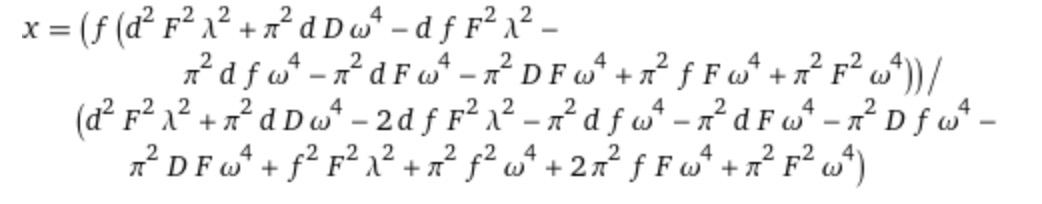

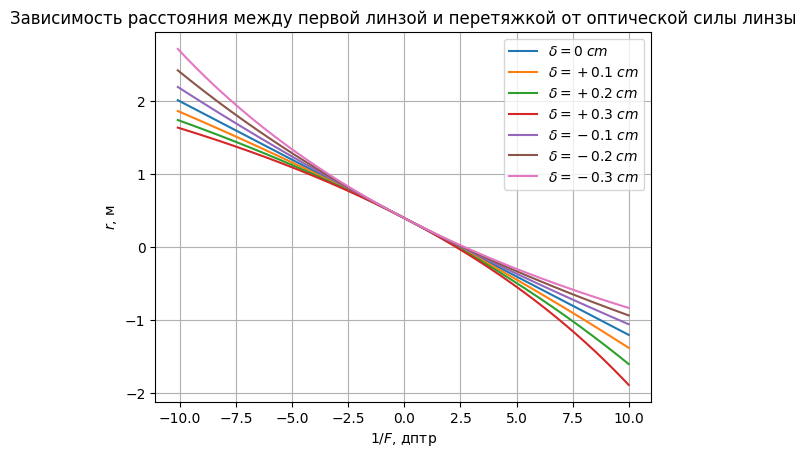

In [56]:
F = np.arange(-10.1, 10.1, 0.1)
omega = 1.7 * 10**(-3) # m
lambdaa = 1064 * 10**(-9) # m
f = 0.4 # m  
d = f # m

def plot_gr(d,s):
    #plt.plot(F, (f*(d**2*(lambdaa**2 + np.pi**2*omega**4*F**(2))-d*(f*lambdaa**2 + F**(2)*np.pi**2*f*omega**4+2*np.pi**2*F**(1)*omega**4) + np.pi**2*omega**4*(f*F+1))) / (d**2*(lambdaa**2+np.pi**2*omega**4*F**(2)) - 2*d*(f*lambdaa**2 + F**(2)*np.pi**2*f*omega**4+np.pi**2*F**(1)*omega**4) + f**2*(lambdaa**2+np.pi**2+omega**4*F**(2)) + 2*np.pi**2*f*F**(1)*omega**4 + np.pi**2*omega**4))
    plt.plot(F, f*(1-d*F) / (-d*F+f*F+1), label = s)

plt.ylabel("$r$, м") 
plt.xlabel("$1/F$, дптр")
plt.title('Зависимость расстояния между первой линзой и перетяжкой от оптической силы линзы') 
plt.grid()


#plt.plot(F, f*(1-d*F) / (-d*F+f*F+1))
plot_gr(f, '$\delta = 0 \; cm$')
plot_gr(f+0.01, '$\delta = +0.1\; cm$')
plot_gr(f+0.02, '$\delta = +0.2\; cm$')
plot_gr(f+0.03, '$\delta = +0.3\; cm$')
plot_gr(f-0.01, '$\delta = -0.1\; cm$')
plot_gr(f-0.02, '$\delta = -0.2\; cm$')
plot_gr(f-0.03, '$\delta = -0.3\; cm$')

plt.legend()